Introduction: Manual Feature Engineeringを参照

## importを行う

In [1]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [6]:
#自作関数
import importlib
import functionscript as fs

In [29]:
# データの読み込み
bureau = pd.read_csv('../input/bureau.csv')

bureau.head(20)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0       215354       5714462        Closed      currency 1         -497   
1       215354       5714463        Active      currency 1         -208   
2       215354       5714464        Active      currency 1         -203   
3       215354       5714465        Active      currency 1         -203   
4       215354       5714466        Active      currency 1         -629   
5       215354       5714467        Active      currency 1         -273   
6       215354       5714468        Active      currency 1          -43   
7       162297       5714469        Closed      currency 1        -1896   
8       162297       5714470        Closed      currency 1        -1146   
9       162297       5714471        Active      currency 1        -1146   
10      162297       5714472        Active      currency 1        -1146   
11      162297       5714473        Closed      currency 1        -2456   
12      162297       5714474        Active      currency 1         -277   
13      402440       5714475        Active      currency 1          -96   
14      238881       5714482        Closed      currency 1         -318   
15      238881       5714484        Closed      currency 1        -2911   
16      238881       5714485        Closed      currency 1        -2148   
17      238881       5714486        Active      currency 1         -381   
18      238881       5714487        Active      currency 1          -95   
19      238881       5714488        Closed      currency 1         -444   

    CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                    0               -153.0             -153.0   
1                    0               1075.0                NaN   
2                    0                528.0                NaN   
3                    0                  NaN                NaN   
4                    0               1197.0                NaN   
5                    0              27460.0                NaN   
6                    0                 79.0                NaN   
7                    0              -1684.0            -1710.0   
8                    0               -811.0             -840.0   
9                    0               -484.0                NaN   
10                   0               -180.0                NaN   
11                   0               -629.0             -825.0   
12                   0               5261.0                NaN   
13                   0                269.0                NaN   
14                   0               -187.0             -187.0   
15                   0              -2607.0            -2604.0   
16                   0              -1595.0             -987.0   
17                   0                  NaN                NaN   
18                   0               1720.0                NaN   
19                   0                -77.0              -77.0   

    AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                      NaN                   0        91323.00   
1                      NaN                   0       225000.00   
2                      NaN                   0       464323.50   
3                      NaN                   0        90000.00   
4                  77674.5                   0      2700000.00   
5                      0.0                   0       180000.00   
6                      0.0                   0        42103.80   
7                  14985.0                   0        76878.45   
8                      0.0                   0       103007.70   
9                      0.0                   0         4500.00   
10                     0.0                   0       337500.00   
11                     NaN                   0       675000.00   
12                     0.0                   0      7033500.00   
13                     0.0                   0        89910.00   
14                     NaN                   0     

In [30]:
bureau.shape

(1716428, 17)

# 欠損値の見てみる

In [49]:
import missingno as msno

In [51]:
missing_data = fs.missing_check(bureau)
missing_data.head(20)

Number of missing columns: 7


Total   Percent
AMT_ANNUITY             1226791  0.714735
AMT_CREDIT_MAX_OVERDUE  1124488  0.655133
DAYS_ENDDATE_FACT        633653  0.369170
AMT_CREDIT_SUM_LIMIT     591780  0.344774
AMT_CREDIT_SUM_DEBT      257669  0.150119
DAYS_CREDIT_ENDDATE      105553  0.061496
AMT_CREDIT_SUM               13  0.000008
CREDIT_TYPE                   0  0.000000
AMT_CREDIT_SUM_OVERDUE        0  0.000000
CNT_CREDIT_PROLONG            0  0.000000
DAYS_CREDIT_UPDATE            0  0.000000
CREDIT_DAY_OVERDUE            0  0.000000
DAYS_CREDIT                   0  0.000000
CREDIT_CURRENCY               0  0.000000
CREDIT_ACTIVE                 0  0.000000
SK_ID_BUREAU                  0  0.000000
SK_ID_CURR                    0  0.000000

In [56]:
#bureau[['AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_OVERDUE']].head(20)

In [28]:
bureau['AMT_ANNUITY'].value_counts(dropna=False)

NaN           1226791
0.000          256915
4500.000         5182
13500.000        3147
22500.000        2502
               ...   
466407.000          1
12867.525           1
4887.360            1
4708.980            1
3176.190            1
Name: AMT_ANNUITY, Length: 40322, dtype: int64

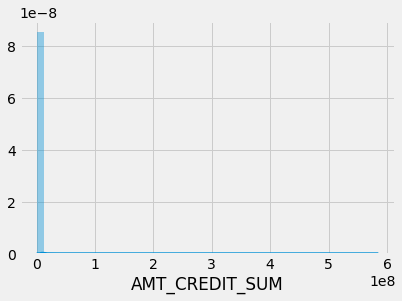

In [42]:
sns.distplot(bureau['AMT_CREDIT_SUM'])

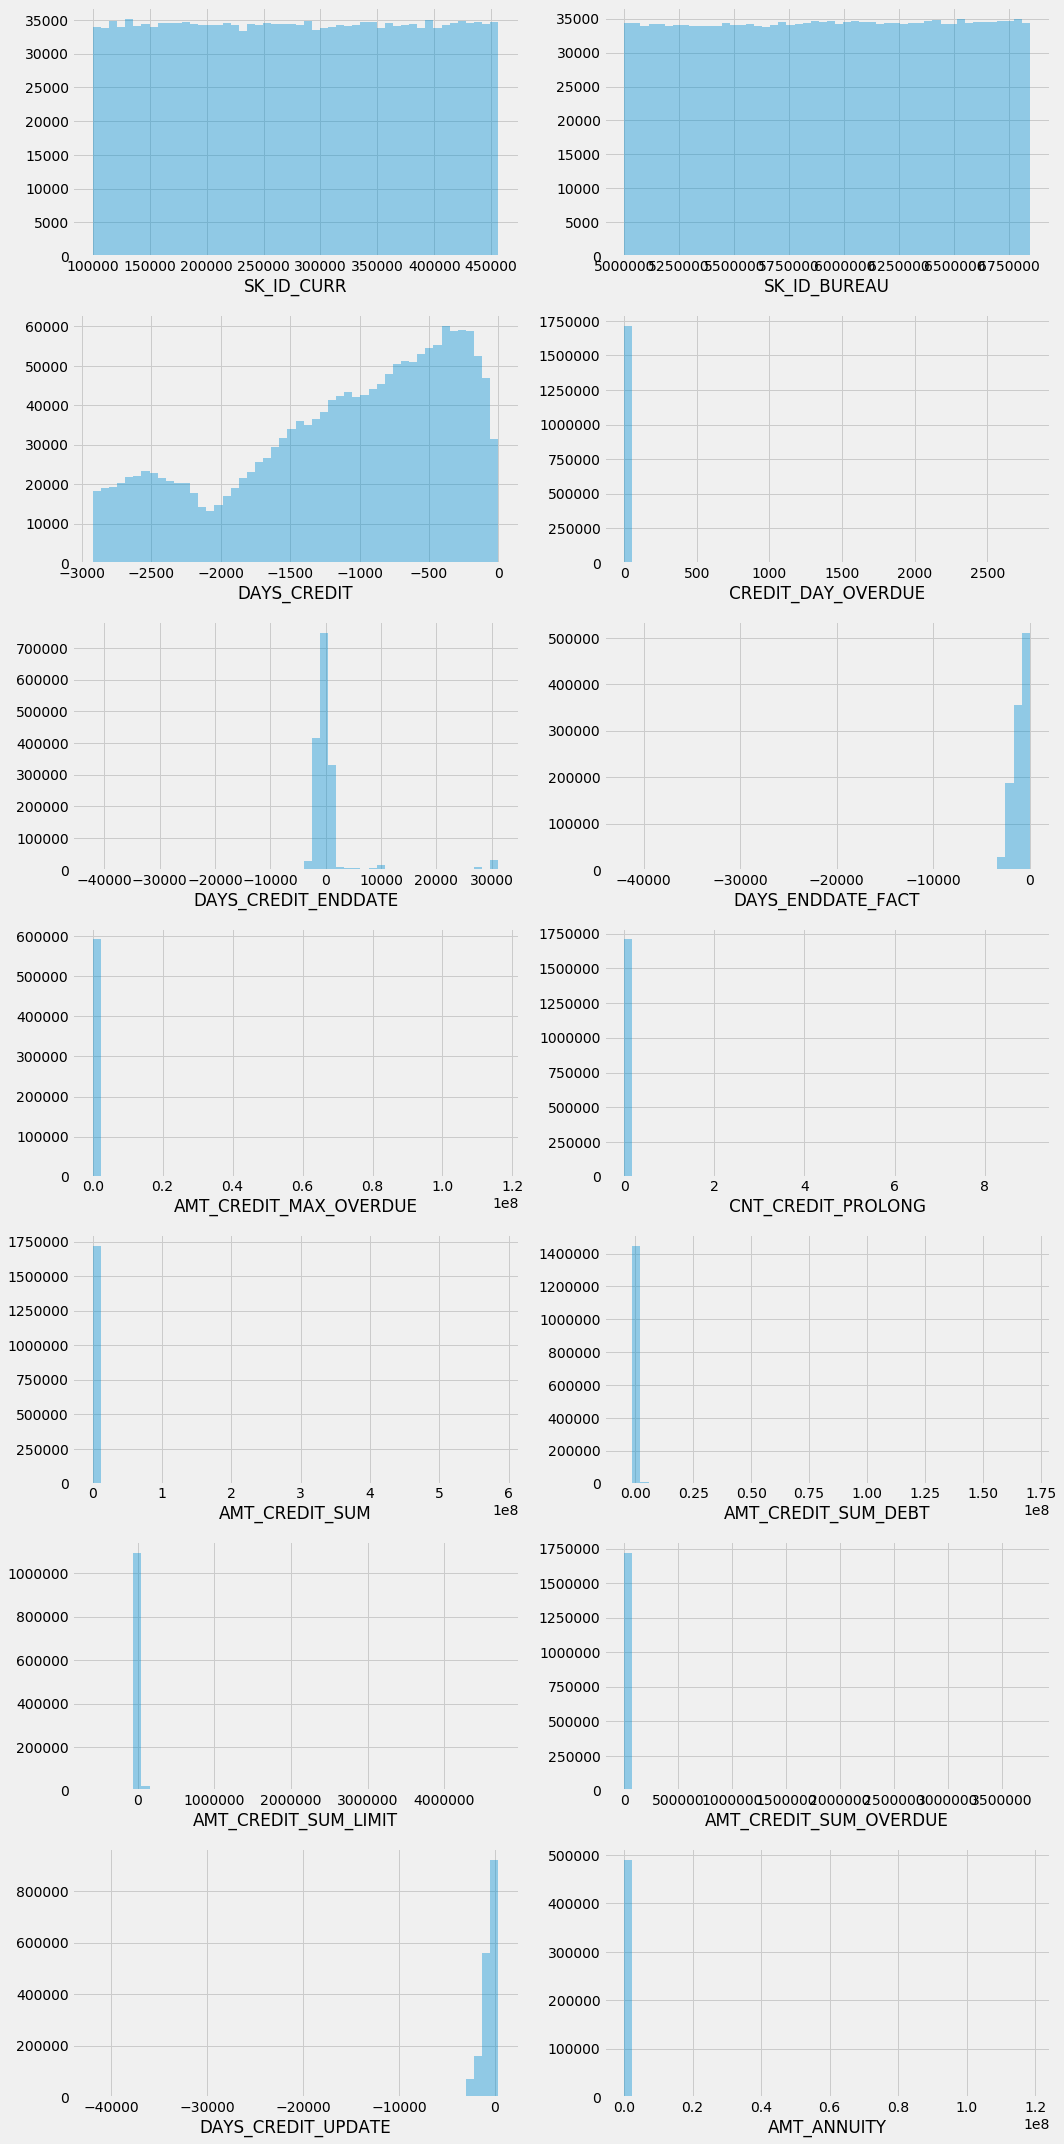

In [48]:
#連続変数の可視化
numerical_feats = list(bureau.dtypes[bureau.dtypes != "object"].index)
fig, axs = plt.subplots(7, 2, figsize=(15,30))
for num,col in enumerate(numerical_feats):
    sns.distplot(bureau[col], ax=axs[num//2][num%2], kde=False)

plt.tight_layout()
plt.show()

In [46]:
len(numerical_feats)

14

## objectの変数の可視化

In [16]:
bureau.select_dtypes('object').columns

Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

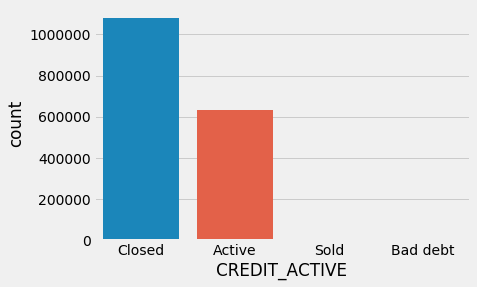

In [19]:
sns.countplot(x=bureau['CREDIT_ACTIVE'],data=bureau)
bureau['CREDIT_ACTIVE'].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

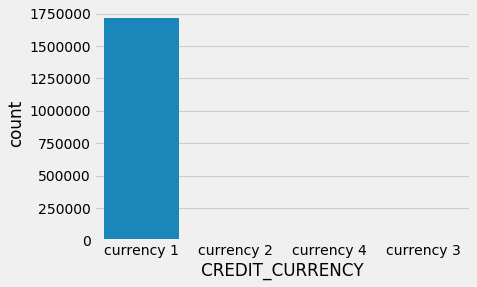

In [21]:
sns.countplot(x=bureau['CREDIT_CURRENCY'],data=bureau)
bureau['CREDIT_CURRENCY'].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

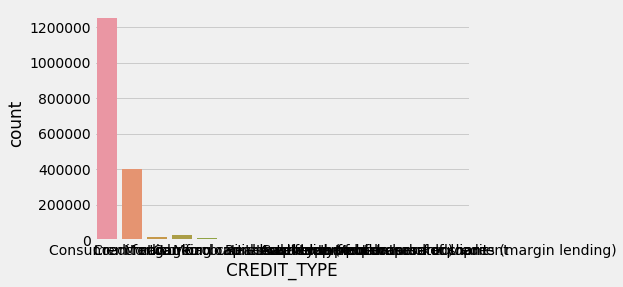

In [22]:
sns.countplot(x=bureau['CREDIT_TYPE'],data=bureau)
bureau['CREDIT_TYPE'].value_counts()

## クライアントごとに過去のローンの回数を算出する

In [3]:
# クライアントのIDでまとめ、ローンの回数を数える
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()



SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [4]:
#application_trainに追加
train = pd.read_csv('../input/application_train.csv')
train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  previous_loan_counts  
0                        0.0                         1.0                   8.0  
1                        0.0                         0.0                   4.0  
2                        0.0                         0.0                   2.0  
3                        NaN                         NaN                   0.0  
4                        0.0                         0.0                   1.0  

[5 rows x 123 columns]

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     4.0000


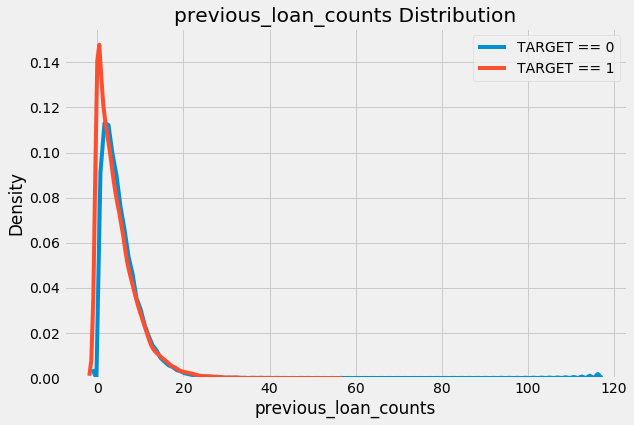

In [7]:
fs.kde_target('previous_loan_counts','TARGET',train)

## クライアントごとにbureauを集計し、application_trainに追加

In [8]:
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                ... DAYS_CREDIT_UPDATE                               \
  mean max min  ...              count        mean  max   min   sum   
0  0.0   0   0  ...                  7  -93.142857   -6  -155  -652   
1  0.0   0   0  ...                  8 -499.875000   -7 -1185 -3999   
2  0.0   0   0  ...                  4 -816.000000  -43 -2131 -3264   
3  0.0   0   0  ...                  2 -532.000000 -382  -682 -1064   
4  0.0   0   0  ...                  3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [9]:
#マルチレベルインデックスを単一のカラムにする
#リストの中にカラム名を入れていく
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [10]:
bureau_agg.columns = columns
bureau_agg.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [11]:
#トレインデータにマージする
train = train.merge(bureau_agg, on='SK_ID_CURR', how='left')
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  bureau_DAYS_CREDIT_UPDATE_count bureau_DAYS_CREDIT_UPDATE_mean  \
0  ...                              8.0                       -499.875   
1  ...                              4.0                       -816.000   
2  ...                              2.0                       -532.000   
3  ...                              NaN                            NaN   
4  ...                              1.0                       -783.000   

  bureau_DAYS_CREDIT_UPDATE_max bureau_DAYS_CREDIT_UPDATE_min  \
0                          -7.0                       -1185.0   
1                         -43.0                       -2131.0   
2                        -382.0                        -682.0   
3                           NaN                           NaN   
4                        -783.0                        -783.0   

  bureau_DAYS_CREDIT_UPDATE_sum bureau_AMT_ANNUITY_count  \
0                       -3999.0                      7.0   
1                       -3264.0                      0.0   
2                       -1064.0                      0.0   
3                           NaN                      NaN   
4                        -783.0                      0.0   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0                      0.0                     0.0                     0.0   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   

   bureau_AMT_ANNUITY_sum  
0                     0.0  
1                     0.0  
2                     0.0  
3                     NaN  
4                     0.0  

[5 rows x 183 columns]

## 新しく追加したカラムとTargetの相関係数を求める

In [12]:
#新しく追加したカラムの相関係数を求める
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = train['TARGET'].corr(train[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))

In [13]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968668),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392113),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05373489560102051),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758661),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.04885350261111589),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483543),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730176),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484684),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306004),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329046),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.03428110992161599),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325547)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid =     -1067.0000


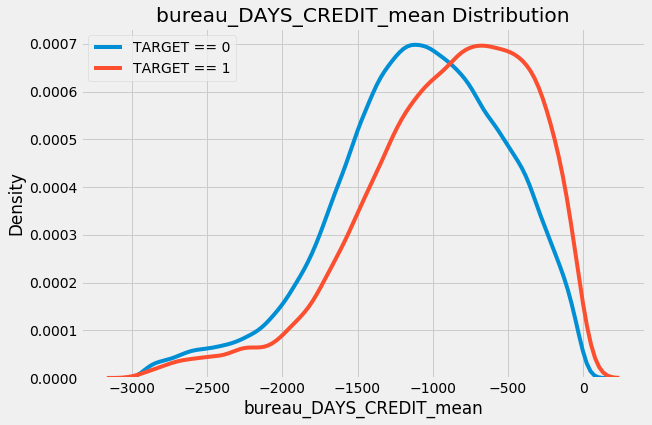

In [31]:
#最も相関係数を高い変数をkdeplotする
fs.kde_target('bureau_DAYS_CREDIT_mean','TARGET', train)

The correlation between SK_ID_CURR and the TARGET is -0.0021
Median value for loan that was not repaid = 276291.0000
Median value for loan that was repaid =     278362.5000
The correlation between bureau_DAYS_CREDIT_count and the TARGET is 0.0041
Median value for loan that was not repaid = 4.0000
Median value for loan that was repaid =     4.0000
The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid =     -1067.0000
The correlation between bureau_DAYS_CREDIT_max and the TARGET is 0.0498
Median value for loan that was not repaid = -221.0000
Median value for loan that was repaid =     -308.0000
The correlation between bureau_DAYS_CREDIT_min and the TARGET is 0.0752
Median value for loan that was not repaid = -1469.0000
Median value for loan that was repaid =     -1861.0000
The correlation between bureau_DAYS_CREDIT_sum and the TARGET is 0.0420
Median value for loan that was not 

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

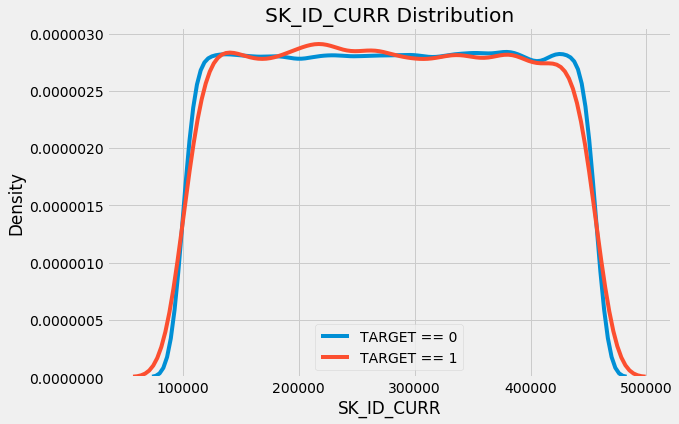

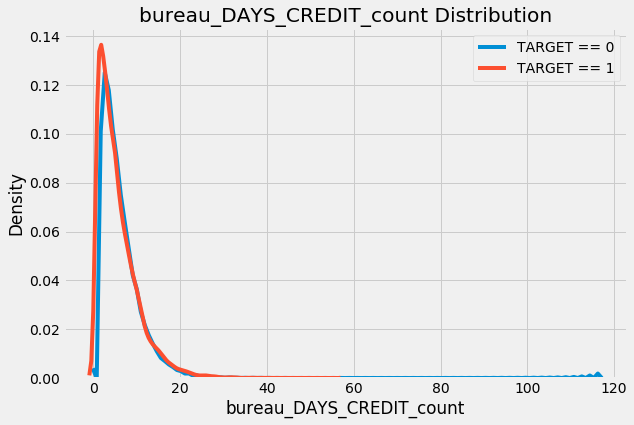

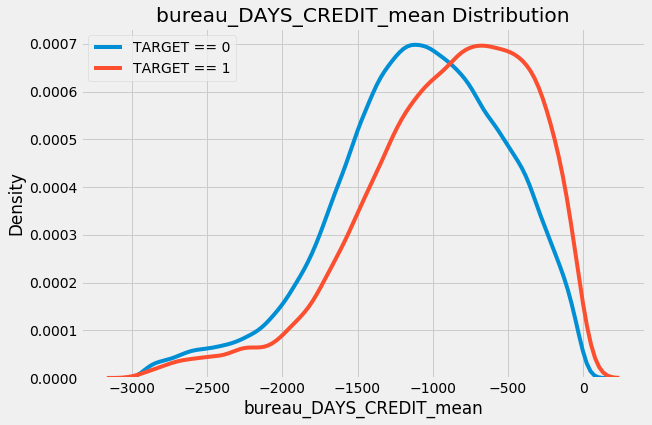

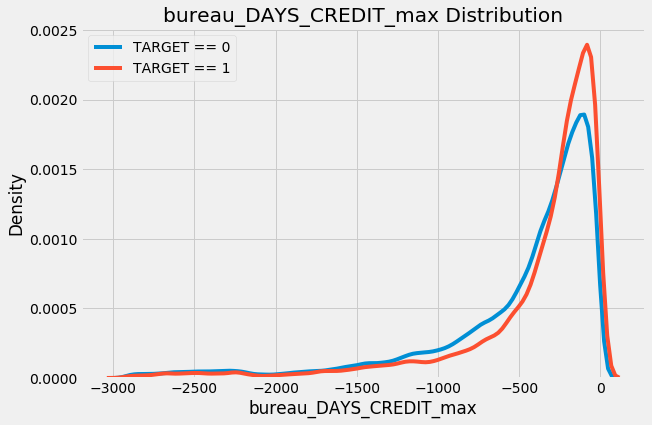

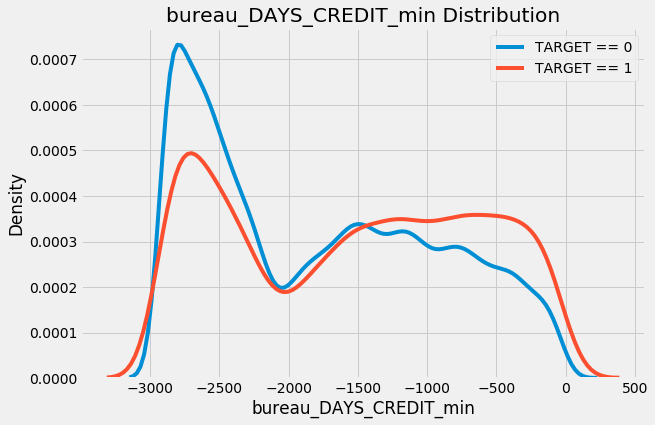

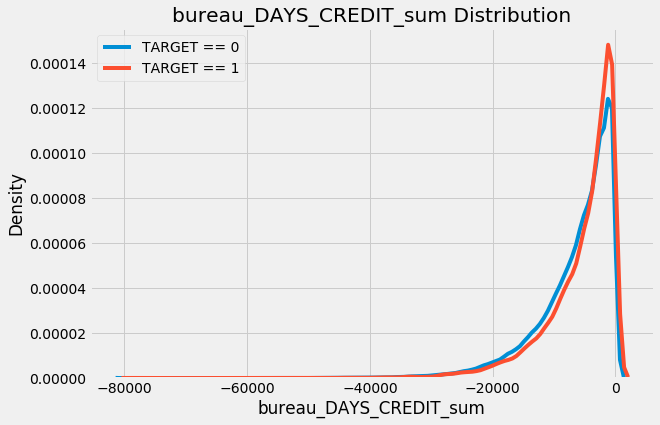

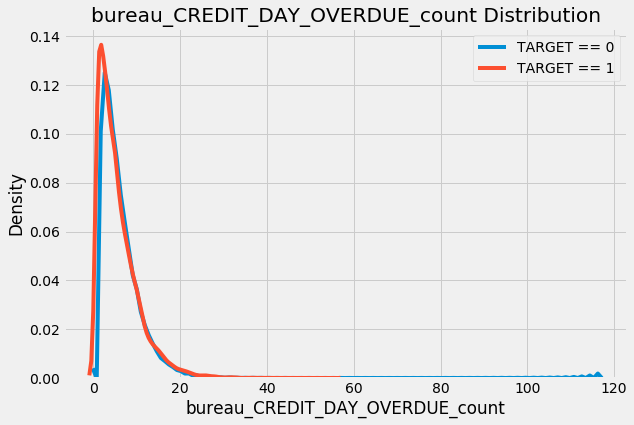

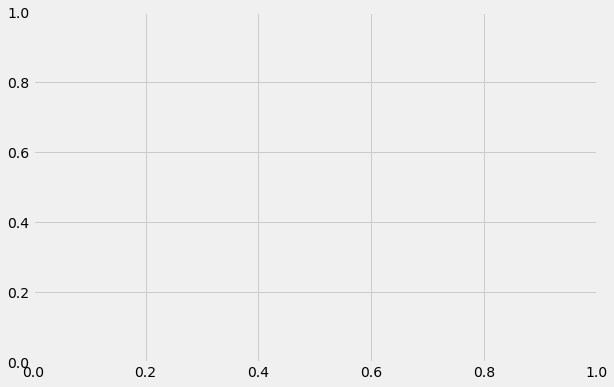

In [32]:
for col in columns:
    fs.kde_target(col,'TARGET', train)

## カテゴリ変数について

In [ ]:
#クライアントごとに変数の値をカウントしたい

In [57]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  \
0                     0                       0                     1   
1                     1                       0                     0   
2                     1                       0                     0   
3                     1                       0                     0   
4                     1                       0                     0   

   CREDIT_ACTIVE_Sold  CREDIT_CURRENCY_currency 1  CREDIT_CURRENCY_currency 2  \
0                   0                           1                           0   
1                   0                           1                           0   
2                   0                           1                           0   
3                   0                           1                           0   
4                   0                           1                           0   

   CREDIT_CURRENCY_currency 3  CREDIT_CURRENCY_currency 4  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   CREDIT_TYPE_Another type of loan  CREDIT_TYPE_Car loan  ...  \
0                                 0                     0  ...   
1                                 0                     0  ...   
2                                 0                     0  ...   
3                                 0                     0  ...   
4                                 0                     0  ...   

   CREDIT_TYPE_Loan for business development  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   CREDIT_TYPE_Loan for working capital replenishment  CREDIT_TYPE_Microloan  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   

   CREDIT_TYPE_Mobile operator loan  CREDIT_TYPE_Mortgage  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     0   
3                                 0                     0   
4                                 0                     0   

   CREDIT_TYPE_Real estate loan  CREDIT_TYPE_Unknown type of loan  SK_ID_CURR  
0                             0                                 0      215354  
1                             0                                 0      215354  
2                             0                                 0      215354  
3                             0                                 0      215354  
4                             0                                 0      215354 

In [58]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum','mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1       ... CREDIT_TYPE_Microloan       \
                                  sum mean  ...                   sum mean   
SK_ID_CURR                                  ...                              
100001                              7  1.0  ...                     0  0.0   
100002                              8  1.0  ...                     0  0.0   
100003                              4  1.0  ...                     0  0.0   
100004                              2  1.0  ...                     0  0.0   
100005                              3  1.0  ...                     0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

In [59]:
categorical_grouped.columns.levels[0][:10]

Index(['CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold',
       'CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2',
       'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4',
       'CREDIT_TYPE_Another type of loan', 'CREDIT_TYPE_Car loan'],
      dtype='object')

In [60]:
categorical_grouped.columns.levels[1]

Index(['sum', 'mean'], dtype='object')

In [61]:
group_var = 'SK_ID_CURR'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

CREDIT_ACTIVE_Active_count  CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                                                
100001                               3                         0.428571   
100002                               2                         0.250000   
100003                               1                         0.250000   
100004                               0                         0.000000   
100005                               2                         0.666667   

            CREDIT_ACTIVE_Bad debt_count  CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                                                    
100001                                 0                                0.0   
100002                                 0                                0.0   
100003                                 0                                0.0   
100004                                 0                                0.0   
100005                                 0                                0.0   

            CREDIT_ACTIVE_Closed_count  CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                                                
100001                               4                         0.571429   
100002                               6                         0.750000   
100003                               3                         0.750000   
100004                               2                         1.000000   
100005                               1                         0.333333   

            CREDIT_ACTIVE_Sold_count  CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                                            
100001                             0                            0.0   
100002                             0                            0.0   
100003                             0                            0.0   
100004                             0                            0.0   
100005                             0                            0.0   

            CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                     
100001                                     7   
100002                                     8   
100003                                     4   
100004                                     2   
100005                                     3   

            CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                         ...   
100001                                        1.0  ...   
100002                                        1.0  ...   
100003                                        1.0  ...   
100004                                        1.0  ...   
100005                                        1.0  ...   

            CREDIT_TYPE_Microloan_count  CREDIT_TYPE_Microloan_count_norm  \
SK_ID_CURR                                                                  
100001                                0                               0.0   
100002                                0                               0.0   
100003                                0                               0.0   
100004                                0                               0.0   
100005                                0                               0.0   

            CREDIT_TYPE_Mobile operator loan_count  \
SK_ID_CURR                                           
100001                                           0   
100002                                           0   
100003                                           0   
100004                                           0   
100005                                           0   

            CREDIT_TYPE_Mobile operator loan_count_norm  \
SK_ID_CURR                                                
100001                                              0.0   
100002                                              0.0   
100003   

In [62]:
train = train.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  CREDIT_TYPE_Microloan_count CREDIT_TYPE_Microloan_count_norm  \
0  ...                          0.0                              0.0   
1  ...                          0.0                              0.0   
2  ...                          0.0                              0.0   
3  ...                          NaN                              NaN   
4  ...                          0.0                              0.0   

  CREDIT_TYPE_Mobile operator loan_count  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

  CREDIT_TYPE_Mobile operator loan_count_norm CREDIT_TYPE_Mortgage_count  \
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         0.0                        0.0   
3                                         NaN                        NaN   
4                                         0.0                        0.0   

  CREDIT_TYPE_Mortgage_count_norm  CREDIT_TYPE_Real estate loan_count  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             NaN                                 NaN   
4                             0.0                                 0.0   

   CREDIT_TYPE_Real estate loan_count_norm  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      NaN   
4                                      0.0   

   CREDIT_TYPE_Unknown type of loan_count  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     NaN   
4                                     0.0   

   CREDIT_TYPE_Unknown type of loan_count_norm  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3                                          NaN  
4                                          0.0  

[5 rows x 229 columns]

In [63]:
train.shape

(307511, 229)

In [76]:
#関数化して改めて代入
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

bureau_CREDIT_ACTIVE_Active_count  \
SK_ID_CURR                                      
100001                                      3   
100002                                      2   
100003                                      1   
100004                                      0   
100005                                      2   

            bureau_CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                           
100001                                    0.428571   
100002                                    0.250000   
100003                                    0.250000   
100004                                    0.000000   
100005                                    0.666667   

            bureau_CREDIT_ACTIVE_Bad debt_count  \
SK_ID_CURR                                        
100001                                        0   
100002                                        0   
100003                                        0   
100004                                        0   
100005                                        0   

            bureau_CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_ACTIVE_Closed_count  \
SK_ID_CURR                                      
100001                                      4   
100002                                      6   
100003                                      3   
100004                                      2   
100005                                      1   

            bureau_CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                           
100001                                    0.571429   
100002                                    0.750000   
100003                                    0.750000   
100004                                    1.000000   
100005                                    0.333333   

            bureau_CREDIT_ACTIVE_Sold_count  \
SK_ID_CURR                                    
100001                                    0   
100002                                    0   
100003                                    0   
100004                                    0   
100005                                    0   

            bureau_CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                         
100001                                       0.0   
100002                                       0.0   
100003                                       0.0   
100004                                       0.0   
100005                                       0.0   

            bureau_CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                            
100001                                            7   
100002                                            8   
100003                                            4   
100004                                            2   
100005                                            3   

            bureau_CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                                ...   
100001                                               1.0  ...   
100002                                               1.0  ...   
100003                                               1.0  ...   
100004                                               1.0  ...   
100005                                               1.0  ...   

            bureau_CREDIT_TYPE_Microloan_count  \
SK_ID_CURR                                       
100001                                       0   
100002                                       0   
100003                                       0   
100004                      

## bureau_balanceのデータを追加

In [65]:
# Read in bureau balance
bureau_balance = pd.read_csv('../input/bureau_balance.csv')


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [73]:
bureau_balance.head(30)
#SK_ID_CURRがないことに注意
#ステータスはその月に支払う残高の状況
#Cはクローズ、Xはステータス不明、0は延滞日なし、1は1~30日の間、2は31~60日の間..., 
#5は120日以上か売却または償却される

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0        5715448               0      C
1        5715448              -1      C
2        5715448              -2      C
3        5715448              -3      C
4        5715448              -4      C
5        5715448              -5      C
6        5715448              -6      C
7        5715448              -7      C
8        5715448              -8      C
9        5715448              -9      0
10       5715448             -10      0
11       5715448             -11      X
12       5715448             -12      X
13       5715448             -13      X
14       5715448             -14      0
15       5715448             -15      0
16       5715448             -16      0
17       5715448             -17      0
18       5715448             -18      0
19       5715448             -19      0
20       5715448             -20      X
21       5715448             -21      X
22       5715448             -22      X
23       5715448             -23      X
24       5715448             -24      X
25       5715448             -25      X
26       5715448             -26      X
27       5715449               0      C
28       5715449              -1      C
29       5715449              -2      C

### 欠損値の処理

In [67]:
missing_data = fs.missing_check(bureau_balance)
missing_data.head(7)
#欠損値はない

Number of missing columns: 0


Total  Percent
STATUS              0      0.0
MONTHS_BALANCE      0      0.0
SK_ID_BUREAU        0      0.0

In [68]:
bureau_balance['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [69]:
bureau_balance['MONTHS_BALANCE'].value_counts()

-1     622601
-2     619243
-3     615080
 0     610965
-4     609138
        ...  
-92     57300
-93     53535
-94     49965
-95     46542
-96     43147
Name: MONTHS_BALANCE, Length: 97, dtype: int64

In [66]:
#STATUSについてSK_ID_BUREAUごとに集計を行う
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()


bureau_balance_STATUS_0_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   5   
5001711                                   3   
5001712                                  10   
5001713                                   0   

              bureau_balance_STATUS_0_count_norm  \
SK_ID_BUREAU                                       
5001709                                 0.000000   
5001710                                 0.060241   
5001711                                 0.750000   
5001712                                 0.526316   
5001713                                 0.000000   

              bureau_balance_STATUS_1_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_1_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_2_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_2_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_3_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_3_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_4_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_4_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_5_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_5_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5

In [70]:
#bureau_balanceについてSK_ID_BUREAUごとに集計を行う
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()


SK_ID_BUREAU  bureau_balance_MONTHS_BALANCE_count  \
0       5001709                                   97   
1       5001710                                   83   
2       5001711                                    4   
3       5001712                                   19   
4       5001713                                   22   

   bureau_balance_MONTHS_BALANCE_mean  bureau_balance_MONTHS_BALANCE_max  \
0                               -48.0                                  0   
1                               -41.0                                  0   
2                                -1.5                                  0   
3                                -9.0                                  0   
4                               -10.5                                  0   

   bureau_balance_MONTHS_BALANCE_min  bureau_balance_MONTHS_BALANCE_sum  
0                                -96                              -4656  
1                                -82                              -3403  
2                                 -3                                 -6  
3                                -18                               -171  
4                                -21                               -231

In [71]:
# 上の2つのDFを繋げる
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# bureauのSK_ID_CURRと紐付ける
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')

bureau_by_loan.head()


SK_ID_BUREAU  bureau_balance_MONTHS_BALANCE_count  \
0       5001709                                   97   
1       5001710                                   83   
2       5001711                                    4   
3       5001712                                   19   
4       5001713                                   22   

   bureau_balance_MONTHS_BALANCE_mean  bureau_balance_MONTHS_BALANCE_max  \
0                               -48.0                                  0   
1                               -41.0                                  0   
2                                -1.5                                  0   
3                                -9.0                                  0   
4                               -10.5                                  0   

   bureau_balance_MONTHS_BALANCE_min  bureau_balance_MONTHS_BALANCE_sum  \
0                                -96                              -4656   
1                                -82                              -3403   
2                                 -3                                 -6   
3                                -18                               -171   
4                                -21                               -231   

   bureau_balance_STATUS_0_count  bureau_balance_STATUS_0_count_norm  \
0                              0                            0.000000   
1                              5                            0.060241   
2                              3                            0.750000   
3                             10                            0.526316   
4                              0                            0.000000   

   bureau_balance_STATUS_1_count  bureau_balance_STATUS_1_count_norm  ...  \
0                              0                                 0.0  ...   
1                              0                                 0.0  ...   
2                              0                                 0.0  ...   
3                              0                                 0.0  ...   
4                              0                                 0.0  ...   

   bureau_balance_STATUS_3_count_norm  bureau_balance_STATUS_4_count  \
0                                 0.0                              0   
1                                 0.0                              0   
2                                 0.0                              0   
3                                 0.0                              0   
4                                 0.0                              0   

   bureau_balance_STATUS_4_count_norm  bureau_balance_STATUS_5_count  \
0                                 0.0                              0   
1                                 0.0                              0   
2                                 0.0                              0   
3                                 0.0                              0   
4                                 0.0                              0   

   bureau_balance_STATUS_5_count_norm  bureau_balance_STATUS_C_count  \
0                                 0.0                             86   
1                                 0.0                             48   
2                                 0.0                              0   
3                                 0.0                              9   
4                                 0.0                              0   

   bureau_balance_STATUS_C_count_norm  bureau_balance_STATUS_X_count  \
0                            0.886598                             11   
1                            0.578313                             30   
2                            0.000000                              1   
3                            0.473684                              0   
4                            0.000000                             22   

   bureau_balance_STATUS_X_count_norm  SK_ID_CURR  
0                            0.113402         NaN  
1                         

# データフレームを作り直す

In [79]:
# Free up memory by deleting old objects
import gc
gc.enable()
#del train, bureau, bureau_balance, bureau_agg, bureau_balance_agg, bureau_balance_counts, bureau_by_loan, bureau_balance_by_client, bureau_counts
gc.collect()

NameError: name 'train' is not defined

In [80]:
# Read in new copies of all the dataframes
train = pd.read_csv('../input/application_train.csv')
bureau = pd.read_csv('../input/bureau.csv')
bureau_balance = pd.read_csv('../input/bureau_balance.csv')

In [81]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

bureau_CREDIT_ACTIVE_Active_count  \
SK_ID_CURR                                      
100001                                      3   
100002                                      2   
100003                                      1   
100004                                      0   
100005                                      2   

            bureau_CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                           
100001                                    0.428571   
100002                                    0.250000   
100003                                    0.250000   
100004                                    0.000000   
100005                                    0.666667   

            bureau_CREDIT_ACTIVE_Bad debt_count  \
SK_ID_CURR                                        
100001                                        0   
100002                                        0   
100003                                        0   
100004                                        0   
100005                                        0   

            bureau_CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_ACTIVE_Closed_count  \
SK_ID_CURR                                      
100001                                      4   
100002                                      6   
100003                                      3   
100004                                      2   
100005                                      1   

            bureau_CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                           
100001                                    0.571429   
100002                                    0.750000   
100003                                    0.750000   
100004                                    1.000000   
100005                                    0.333333   

            bureau_CREDIT_ACTIVE_Sold_count  \
SK_ID_CURR                                    
100001                                    0   
100002                                    0   
100003                                    0   
100004                                    0   
100005                                    0   

            bureau_CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                         
100001                                       0.0   
100002                                       0.0   
100003                                       0.0   
100004                                       0.0   
100005                                       0.0   

            bureau_CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                            
100001                                            7   
100002                                            8   
100003                                            4   
100004                                            2   
100005                                            3   

            bureau_CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                                ...   
100001                                               1.0  ...   
100002                                               1.0  ...   
100003                                               1.0  ...   
100004                                               1.0  ...   
100005                                               1.0  ...   

            bureau_CREDIT_TYPE_Microloan_count  \
SK_ID_CURR                                       
100001                                       0   
100002                                       0   
100003                                       0   
100004                      

In [82]:
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [83]:
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()

bureau_balance_STATUS_0_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   5   
5001711                                   3   
5001712                                  10   
5001713                                   0   

              bureau_balance_STATUS_0_count_norm  \
SK_ID_BUREAU                                       
5001709                                 0.000000   
5001710                                 0.060241   
5001711                                 0.750000   
5001712                                 0.526316   
5001713                                 0.000000   

              bureau_balance_STATUS_1_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_1_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_2_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_2_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_3_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_3_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_4_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_4_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_5_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_5_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5

In [84]:
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

SK_ID_BUREAU  bureau_balance_MONTHS_BALANCE_count  \
0       5001709                                   97   
1       5001710                                   83   
2       5001711                                    4   
3       5001712                                   19   
4       5001713                                   22   

   bureau_balance_MONTHS_BALANCE_mean  bureau_balance_MONTHS_BALANCE_max  \
0                               -48.0                                  0   
1                               -41.0                                  0   
2                                -1.5                                  0   
3                                -9.0                                  0   
4                               -10.5                                  0   

   bureau_balance_MONTHS_BALANCE_min  bureau_balance_MONTHS_BALANCE_sum  
0                                -96                              -4656  
1                                -82                              -3403  
2                                 -3                                 -6  
3                                -18                               -171  
4                                -21                               -231

In [85]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')

In [86]:
#もともとあったカラムを変数に入れておく
original_features = list(train.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  122


In [87]:
# Merge with the value counts of bureau
train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [88]:
#新しいカラムをリストに入れる
new_features = list(train.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Number of features using previous loans from other institutions data:  333


これで、trainとbureauとbreau_balanceを繋いだデータフレームができた

## 以下、関数記述

In [33]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [34]:
# Function to calculate correlations with the target for a dataframe
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [64]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical